# Analysis of the Success of a Promotional Offer

# --------------------------------------------------------------------------------------------

# Arvind Ramkumar

### Email - aramkum4@asu.edu | arvindramkumar1996@gmail.com
### Phone - 480(859)2393 

# --------------------------------------------------------------------------------------------

## Problem Statement 

This is a detailed analysis of whether or not this Promotional offer was actually profitable for the company, because sometimes promotional offer have the tendency to show a profitability when it is actually not. 

___
Also suggestions are given on how to improvise the benefits of the Promotional offer

## Assumption

1. As the Move Out Date is missing for most of the data, we assume that the date when the data was collected (06/11/2014) to be the move out dates 
2. Here, we have compared between With Promotion and Without Promotion to understand the success of the Promotional Offer 

# I. Data Preprocessing 

## 1.1 Basics  

1. Import Libraries
2. Import Data Set 
3. Explaining the Variables used in Analysis 

## 1.2 Quality Check  

1. The Data was checked for Number of Null and Not Null Values, column wise
2. The Data Frame's Shape, Dtypes are checked to have a better understanding of the Model
3. Check the type of Unique Values (In Categorical Variable) Present in the Data

## 1.3 Data Munging 

1. Remove all the Spaces in the Column Names
2. Convert the Rent from Boolean to 1 or 0 - 1 for True, 0 for False
3. Filling in all Null Values in Promotion with a new category - No Promotion 
4. Remove $ from RentedRate and StreetRate and Convert it to Float - Also remove % From Concession
5. Rename the column names by removing ?
6. Convert the Reserve Date and Move In Date from Object to Date Format 
7. Assume all the Move Out Date which is not given as (6/11/2014)
8. Obtaining the length of stay of each customer
9. Obtaining the Revenue of the Company 

# II. Data Analysis 

Qn 1 - Free month promotions are effectively a discount for the customer, though hopefully generate some ultimate benefit to revenue.  Using the dataset, can you assess how much incremental revenue is generated (or lost) from the free month promotions?


_________________________________
Qn 2 - Free month promotions are effectively a discount for the customer, though hopefully generate some ultimate benefit to revenue.  Using the dataset, can you assess how much incremental revenue is generated (or lost) from the free month promotions?

________
Qn 3 - To what degree does the length of customers' stays impact your responses above and how should it be considered?  What is the most appropriate way to consider customer length of stay, given the number of customers still renting?

_____
Qn 4 - How do customer type (based on survey responses), geographic/regional variations, reservation channel, and price concessions impact consideration of (1) and (2) above?
_________
Qn 5 - What type of restrictions and/or creative adjustments to the structure of the free month promotions would you recommend in order to increase the profitability of the promotion? Can these recommendations be justified by the data provided?

_______


Qn 6 - What additional information would be helpful to have to better determine the profitability of the First Month Free promotion?

_______
Qn 7 - Estimate probabilistically the likelihood that CubeSmart received more rentals as of result of offering promotions


# III. Findings and Recommendations 

# IV. Future Work

# --------------------------------------------------------------------------------------------

# I. Data Preprocessing 

## 1.1 Basics

### 1.1.1 Importing Basic Libraries 

In [1]:
import pandas as pd 
import numpy as np

### 1.1.2 Import Dataset 

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Store,Account ID,SquareFeet,Rented?,ReserveDate,Move In Date,Move Out Date,Promotion Name,Source,RentRate,StreetRate,Concession,Region,Previously Used Storage?,Purpose?,Storage Reason
0,3475,105000,0,False,11/11/12,11/17/12,NaN,NaN,Store Reservation,$81.00,$81.00,0.0%,Inland Empire,NaN,NaN,NaN
1,4115,105001,25,False,11/11/12,11/11/12,NaN,NaN,Store Reservation,$84.00,$84.00,0.0%,Ohio,NaN,NaN,NaN
2,4615,105002,200,False,11/11/12,11/11/12,NaN,NaN,Store Reservation,$246.00,$246.00,0.0%,Other Southeast,NaN,NaN,NaN
3,1615,105003,300,True,11/11/12,11/11/12,NaN,NaN,Web Reservation,$224.00,$224.00,0.0%,Inland Empire,No,Other,Other
4,3355,105004,50,False,11/11/12,11/13/12,NaN,NaN,Web Reservation,$64.00,$64.00,0.0%,Inland Empire,NaN,NaN,NaN


### 1.1.3 Variables Explained 

1.  Store - The ID that represents which store of CubeSmart it is
2.  Account ID - The ID for the customer
3.  SquareFeet - Amount of Area the customer did rent
4.  Rented? - After reservation, did the customer actually use the facility or not
5.  ReserveDate - The date of reservation
6.  Move In Date - The Move In Date of the Customer (Given during the time of reservation)
7.  Move Out Date - The Move out Date (Missing Values means, the customer is still using the facility)
8.  Promotion Name - The Type of Promotion offered to the customer (Missing - No Promotions)
9.  Source - The Resevation Channel used to making the reservations
10. Rent Rate - The Actual Rent After the Concession
11. Street Rate - The Actual Rate (Gross) of Storage Space
12. Concession - % Discount on Street Rate 
13. Region - The Area in which the store us located (State)
14. Previously Used Storage - Whether the customer used the storage previously 
15. Purpose - Purpose of renting the space
16. Storage Reason - The Storage Stuffs

## 1.2 Quality Check  

### 1.2.1 Check For the Number of Null and Not Null Values Columnwise 

In [4]:
# Number of Not Null Values

notnull_columns = df.columns[df.notnull().any()]
df[notnull_columns].notnull().sum()

Store                       58664
Account ID                  58664
SquareFeet                  58664
Rented?                     58664
ReserveDate                 58664
Move In Date                58664
Move Out Date               15325
Promotion Name              38874
Source                      58664
 RentRate                   58664
 StreetRate                 58664
Concession                  58664
Region                      58664
Previously Used Storage?    36694
Purpose?                    36659
Storage Reason              36659
dtype: int64

In [5]:
# Number of Null Values 
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Move Out Date               43339
Promotion Name              19790
Previously Used Storage?    21970
Purpose?                    22005
Storage Reason              22005
dtype: int64

### 1.2.2 Check for the shape and Dtypes  

In [6]:
# Shape of the Data 
print('Shape of the Dataframe is' , df.shape)

# Type of Data Type 
df.dtypes

Shape of the Dataframe is (58664, 16)


Store                        int64
Account ID                   int64
SquareFeet                   int64
Rented?                       bool
ReserveDate                 object
Move In Date                object
Move Out Date               object
Promotion Name              object
Source                      object
 RentRate                   object
 StreetRate                 object
Concession                  object
Region                      object
Previously Used Storage?    object
Purpose?                    object
Storage Reason              object
dtype: object

### 1.2.3 Unique Values in Categorical Variables Seen

In [7]:
# Check the Number of Uniques Values 

PromotionUniques = df.groupby('Promotion Name')['Account ID'].nunique()
RentalUniques = df.groupby('Rented?')['Account ID'].nunique()
SourceUniques = df.groupby('Source')['Account ID'].nunique()
RegionUniques = df.groupby('Region')['Account ID'].nunique()
PurposeUniques = df.groupby('Purpose?')['Account ID'].nunique()
StorageUniques = df.groupby('Storage Reason')['Account ID'].nunique()

print(PromotionUniques)
print('\n',RentalUniques)
print('\n',SourceUniques)
print('\n',RegionUniques)
print('\n',PurposeUniques)
print('\n',StorageUniques)

Promotion Name
First Month Free         33293
First Month Half Off      4270
Three Months Half off      670
Two Months Free            312
Two Months Half Off        329
Name: Account ID, dtype: int64

 Rented?
False    21970
True     36694
Name: Account ID, dtype: int64

 Source
Sales Center Reservation    18793
Store Reservation           19047
Web Reservation             20824
Name: Account ID, dtype: int64

 Region
Arizona / Las Vegas           5272
Atlanta                       4610
Baltimore / DC                1812
Boston                        2404
Chicago                        674
Colorado / Utah               4818
Connecticut                   2278
Florida Markets - Other       2581
Inland Empire                 6940
Miami / Ft. Lauderdale        2534
New York / Northern NJ        3440
Ohio                          6717
Other Midwest                 3473
Other Northeast               1734
Other Southeast                872
Other West                    1641
Philadelphia / So

## 1.3 Data Munging

### 1.3.1 Removing Space from all column Names for better Accessiblity  

In [8]:
# Remove all the spaces in the column heading for better accessiblity 

df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### 1.3.2 Convert Rented? to 1 or 0 From Yes or No  

In [9]:
# Convert Rented? in boolean to 1 and 0, where 1 is True and 0 is False

df *= 1

# Convert Rented to int
df['Rented?'] = df['Rented?'].astype(int)

### 1.3.3 Replace all the Missing Values in Promotion_Name with No Promotion 

In [10]:
# Replace Null Values in Promotion to No Promotion

df["Promotion_Name"].fillna("No Promotion", inplace = True)

### 1.3.4 Removing $ from RentRate and StreetRate, % from Concession and Convert All three to Float 

In [11]:
df['RentRate'] = df['RentRate'].str.replace('$', '')
df['RentRate'] = df['RentRate'].astype(float)

df['StreetRate'] = df['StreetRate'].str.replace('$', '')
df['StreetRate'] = df['StreetRate'].astype(float)

df['Concession'] = df['Concession'].str.replace('%', '')
df['Concession'] = df['Concession'].astype(float)

### 1.3.5 Remove ? from the Column Name 

In [12]:
# Remove ? from column name 
df.rename(columns={'Rented?':'Rented', 
                  'Previously_Used_Storage?':'Previously_Used_Storage',
                  'Purpose?':'Purpose'}, 
                 inplace=True)

### 1.3.6  Convert Reserve Date, Move In Date and Move Out Date to Date Time Format

In [13]:
# Convert Reserve Date to Date Format
df['ReserveDate'] = pd.to_datetime(df['ReserveDate'], errors = 'coerce')

# Convert Move In Date to Date Format
df['Move_In_Date'] = pd.to_datetime(df['Move_In_Date'], errors = 'coerce')

# Convert Move Out Date to Date Format
df['Move_Out_Date'] = pd.to_datetime(df['Move_Out_Date'], errors = 'coerce')

### 1.3.7 Add Move out Date for All Missing Move Out Dates (6/11/2014)

In [14]:
# Filling out the Date of Record removal as Move Out Date for Unknown Move Out Date

end = pd.to_datetime('2014-06-11')
df['Move_Out_Date'] = df['Move_Out_Date'].fillna(end)

# Drop Missing Move In Dates Formed due to Incorrect Data Entries 

df=df.drop(df[df['Move_In_Date'].isnull()].index)

### 1.3.8 Calculate the Number of Months the person has used the storage (In Months) 

In [15]:
# Calculating the number of months occupied 

df['Difference'] = (df['Move_Out_Date'].sub(df['Move_In_Date'], axis=0)).dt.days
df['Difference'] = (df['Difference']/30).apply(np.ceil).astype(float)

### 1.3.9 Obtain the Revenue of The Company  

In [16]:
# Know the Amount Earned in Total 

df['AmountEarned'] = np.nan

# No Promotion
df.AmountEarned = df.AmountEarned.mask( df.Promotion_Name == 'No Promotion', df['RentRate']*df['Difference'])

# First Month Free
df.AmountEarned = df.AmountEarned.mask( df.Promotion_Name == 'First Month Free', (df['RentRate']*df['Difference']) - df['RentRate'])

# First Month Half Off 
df.AmountEarned = df.AmountEarned.mask( df.Promotion_Name == 'First Month Half Off', (df['RentRate']*df['Difference']) - (df['RentRate']/2))

# Three Months Half Off 

# Two Months Free 
df.AmountEarned = df.AmountEarned.mask( df.Promotion_Name == 'Two Months Free', (df['RentRate']*df['Difference']) - (df['RentRate']*2))

# Two Months Half Off
df.AmountEarned = df.AmountEarned.mask( df.Promotion_Name == 'Two Months Half Off', (df['RentRate']*df['Difference']) - df['RentRate'])

# Drop Amount Earned for customers who didnt rent
df.AmountEarned = df.AmountEarned.mask( df.Rented == 0, 0)

# It the Months was zero, the corresponding Amount Earned is also Zero 
df.AmountEarned = df.AmountEarned.mask(df.Difference == 0, 0)

# --------------------------------------------------------------------------------------------

# II. Data Analysis 

# Qn 1 - Based on the "cost" (in lost revenue) of providing free month promotions, how much of an increase in rental or reservation volume would CubeSmart have to see to "break even" on the promotion?

## Number of Customers Necessary to break even  

In [17]:
# Average Reveue Per Customer Without Promotion

NoPromotion = df[(df['Promotion_Name'] == 'No Promotion') & (df['Rented'] == 1)]
AverageRevenuePerCustomer = NoPromotion['AmountEarned'].mean()
   
# Possible Revenue Generated Without Promotions

df['NoPromotionEarning'] = np.nan
df.NoPromotionEarning = df['RentRate']*df['Difference']

abc = df.Promotion_Name.unique()
promotionname = abc

total = 0 
for i in promotionname:
    
    # Lost Revenue Due to the Promotion
    FreeMonthPromotion = df[(df['Promotion_Name'] == i) & (df['Rented'] == 1)]
    LostRevenue = (FreeMonthPromotion['NoPromotionEarning'] - FreeMonthPromotion['AmountEarned']).sum()

    # Number of Customers (Without Promotion) Rental Required to Break Even for that Promotional Offer
    NumberOfCustomersNeeded = LostRevenue/AverageRevenuePerCustomer

    ActualRented = df['Rented'].sum()
    Total = 58658 # Total Number of people who reserved
    NoOfReservationReqd = (Total/ActualRented)*NumberOfCustomersNeeded
    print("The Total Number of Reservations Required to Break Even {} is {}".format(i, NoOfReservationReqd))
    
    total = total + NoOfReservationReqd

print('\n')    
print("The Total Number of Reservations Required to Break Even the Promotional Loss Incurred is",total)

The Total Number of Reservations Required to Break Even No Promotion is 0.0
The Total Number of Reservations Required to Break Even Two Months Half Off is 32.02585077593871
The Total Number of Reservations Required to Break Even First Month Half Off is 272.6769835696182
The Total Number of Reservations Required to Break Even First Month Free is 3636.3758838818885
The Total Number of Reservations Required to Break Even Three Months Half off is 0.0
The Total Number of Reservations Required to Break Even Two Months Free is 13.662832188201225


The Total Number of Reservations Required to Break Even the Promotional Loss Incurred is 3954.7415504156465


## When will the Promotion break through  

In [18]:
import datetime as dt

df['Year'], df['Month'] = df['Move_In_Date'].dt.year, df['Move_In_Date'].dt.month
df['Quarter'] = np.nan
df['Quarter'] = df['Move_In_Date'].dt.quarter

df.Quarter = df.Quarter.mask( (df.Year == 2012) & ((df.Month == 11) | (df.Month == 12)), 0)
df.Quarter = df.Quarter.mask( (df.Year == 2014) & ((df.Month == 1) | (df.Month == 2) | (df.Month == 3)), 5)
df.Quarter = df.Quarter.mask( (df.Year == 2014) & ((df.Month == 4) | (df.Month == 5) | (df.Month == 6)), 6)

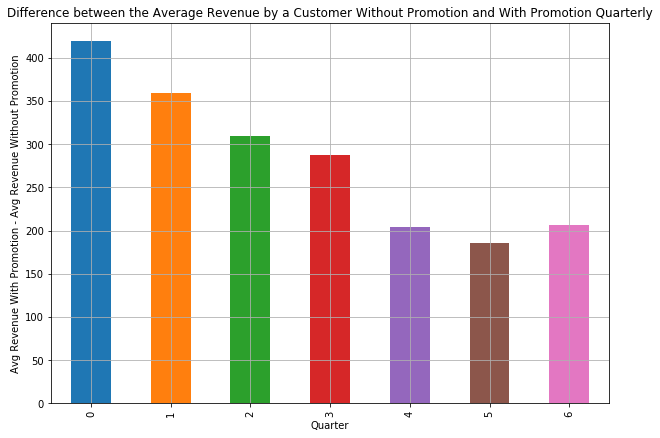

In [19]:
from matplotlib import pyplot as plt

%matplotlib inline 
abcd = df.copy()
abcd['Promo'] = np.nan
abcd.Promo = abcd.Promo.mask( abcd.Promotion_Name == 'No Promotion', 'No Promotion')
abcd.Promo = abcd.Promo.mask( abcd.Promotion_Name != 'No Promotion', 'Promotion')

abcd = abcd[abcd['Rented'] == 1]
abcdp = abcd[abcd['Promo'] == 'Promotion']
abcdnp = abcd[abcd['Promo'] == 'No Promotion']

AVG1 = abcdnp.groupby('Quarter')['AmountEarned'].mean() - abcdp.groupby('Quarter')['AmountEarned'].mean()

fig, ax = plt.subplots(figsize=(10,7))
AVG1.plot.bar(ax = ax)
plt.title('Difference between the Average Revenue by a Customer Without Promotion and With Promotion Quarterly')
plt.xlabel('Quarter')
plt.ylabel('Avg Revenue With Promotion - Avg Revenue Without Promotion')
ax.grid()
plt.show()

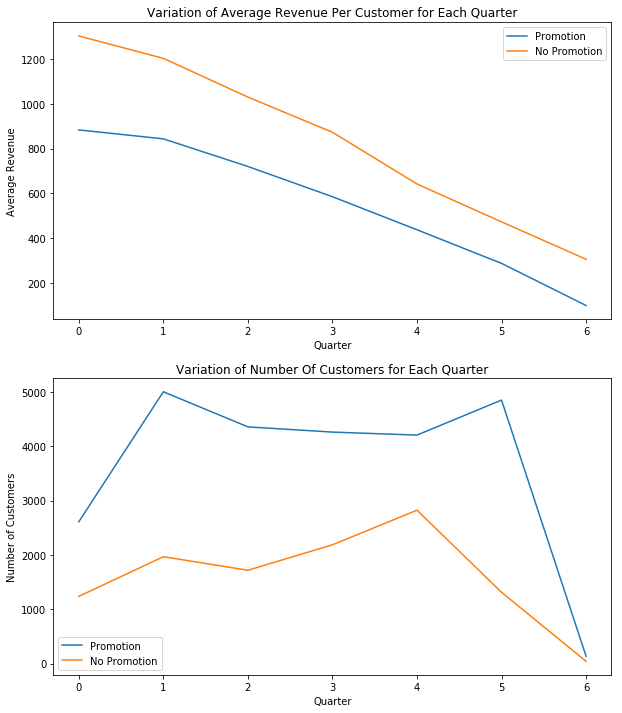

In [20]:
nopromean = abcdnp.groupby('Quarter')['AmountEarned'].mean()
yespromean = abcdp.groupby('Quarter')['AmountEarned'].mean()

noprocount = abcdnp.groupby('Quarter')['AmountEarned'].count()
yesprocount = abcdp.groupby('Quarter')['AmountEarned'].count()

fig, axes= plt.subplots(nrows=2, ncols=1,figsize=(10,12))

axes[0].plot(yespromean,label='Promotion')
axes[0].plot(nopromean,label='No Promotion')
axes[0].legend()
axes[0].set_title('Variation of Average Revenue Per Customer for Each Quarter')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Average Revenue')

axes[1].plot(yesprocount,label='Promotion')
axes[1].plot(noprocount,label='No Promotion')
axes[1].legend()
axes[1].set_title('Variation of Number Of Customers for Each Quarter')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Number of Customers')

plt.show()

In [21]:
change = []

for i in range(0,6,1):

    ch = AVG1[i] - AVG1[i+1]
    change.append(ch)
    
print ('Difference in Avg Revenue With and Without Promotion for Every Quarter', change)

print('\n')
avgchange = (change[0] + change[1]+ change[2]+ change[3]+ change[4]+ change[5])/6
print ('Average Reduction in (Amount Earned W/O Promotion - W/ Promotion For Every Quarter))',avgchange)

print ('\n')
breake = AVG1[6]/avgchange
print ('Number of Quarters Required to Make the Promotion Profitable Following the trend',breake)

Difference in Avg Revenue With and Without Promotion for Every Quarter [60.27413798547764, 49.348163488445834, 22.06865925402394, 83.29524563348019, 19.23278083848595, -21.187078558100296]


Average Reduction in (Amount Earned W/O Promotion - W/ Promotion For Every Quarter)) 35.50531810696888


Number of Quarters Required to Make the Promotion Profitable Following the trend 5.814168714043318


## Avg Revenue W/ Promotion - Avg Revenue W/O Promotion For Every Month  

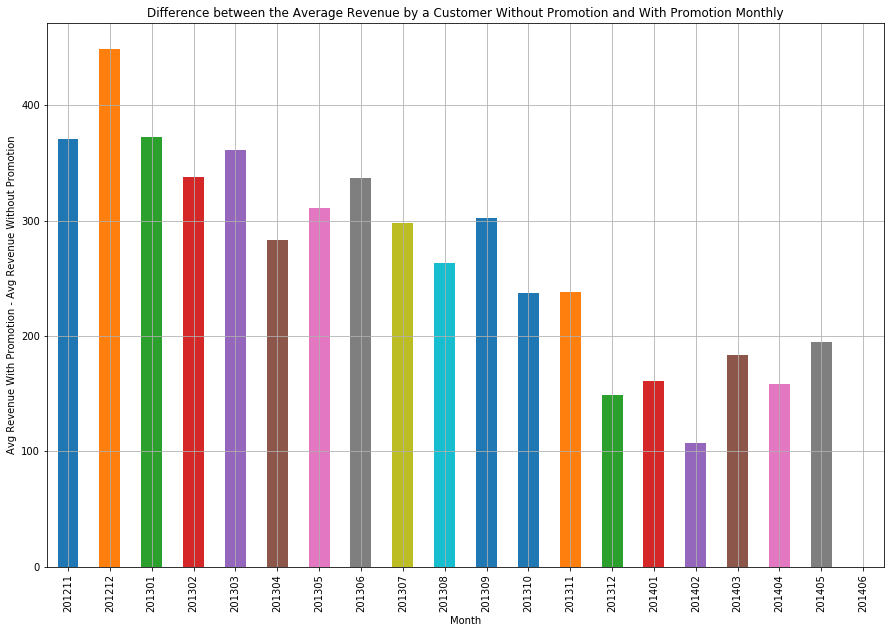

In [22]:
df['YearMonth'] = df['Move_In_Date'].map(lambda x: 100*x.year + x.month)

abcd = df.copy()
abcd['Promo'] = np.nan
abcd.Promo = abcd.Promo.mask( abcd.Promotion_Name == 'No Promotion', 'No Promotion')
abcd.Promo = abcd.Promo.mask( abcd.Promotion_Name != 'No Promotion', 'Promotion')

abcd = abcd[abcd['Rented'] == 1]
abcdp = abcd[abcd['Promo'] == 'Promotion']
abcdnp = abcd[abcd['Promo'] == 'No Promotion']


AVG2 = abcdnp.groupby('YearMonth')['AmountEarned'].mean() - abcdp.groupby('YearMonth')['AmountEarned'].mean()

fig, ax = plt.subplots(figsize=(15,10))
AVG2.plot.bar(ax = ax)
plt.title('Difference between the Average Revenue by a Customer Without Promotion and With Promotion Monthly')
plt.xlabel('Month')
plt.ylabel('Avg Revenue With Promotion - Avg Revenue Without Promotion')
ax.grid()
plt.show()

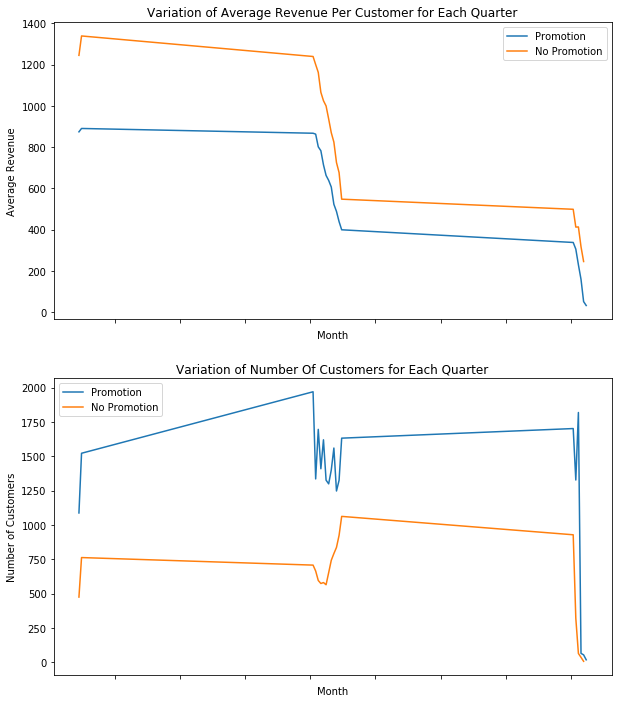

In [23]:
nopromeany = abcdnp.groupby('YearMonth')['AmountEarned'].mean()
yespromeany = abcdp.groupby('YearMonth')['AmountEarned'].mean()

noprocounty = abcdnp.groupby('YearMonth')['AmountEarned'].count()
yesprocounty = abcdp.groupby('YearMonth')['AmountEarned'].count()

fig, axes= plt.subplots(nrows=2, ncols=1,figsize=(10,12))

axes[0].plot(yespromeany,label='Promotion')
axes[0].plot(nopromeany,label='No Promotion')
axes[0].legend()
axes[0].set_title('Variation of Average Revenue Per Customer for Each Quarter')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Revenue')
axes[0].xaxis.set_major_formatter(plt.NullFormatter())


axes[1].plot(yesprocounty,label='Promotion')
axes[1].plot(noprocounty,label='No Promotion')
axes[1].legend()
axes[1].set_title('Variation of Number Of Customers for Each Quarter')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Customers')
axes[1].xaxis.set_major_formatter(plt.NullFormatter())

plt.show()

### We see that The Promotions, bought in an increase in the number of customers, but the Average Revenue by a customer without promotion is high than a Average Revenue by a with promotion - So, the promotion is not a success in revenue perspective of view.  

### Also, with the following trend, we can see that with the next 6 quarters, there is a possiblity that the Average Revenue With Promotion will be higher than Average Revenue without promotion - So there is a high chance that after 6 quarters ~ 1.5 Years, we might see a success in giving promotion

### Also, the total number of reservations required to breakeven the current loss incurred by promotion, taking the number of people who reserve and don't use is ~ 3956 Customers 

# --------------------------------------------------------------------------------------------

# Qn 2  - Free month promotions are effectively a discount for the customer, though hopefully generate some ultimate benefit to revenue.  Using the dataset, can you assess how much incremental revenue is generated (or lost) from the free month promotions?

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


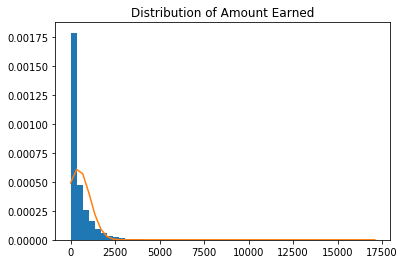

In [24]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(df.AmountEarned, 50, normed=1)
mu = np.mean(df.AmountEarned)
sigma = np.std(df.AmountEarned)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
plt.title('Distribution of Amount Earned')
plt.show()

In [25]:
from scipy.stats import boxcox

# Transformation cant be performed when the data is Zero, Log of Zero is Undefined. So We Drop \it 
df1 = df[(df.AmountEarned != 0) & (df.Difference != 0)]

# Transformation 
df1['AmountEarned'] = boxcox(df1['AmountEarned'], 0)

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


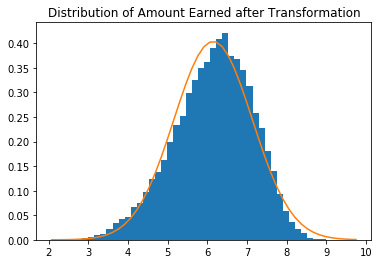

In [26]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(df1.AmountEarned, 50, normed=1)
mu = np.mean(df1.AmountEarned)
sigma = np.std(df1.AmountEarned)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
plt.title('Distribution of Amount Earned after Transformation')
plt.show()

### T test to compare the Means of Promotions and No Promotions  

Now, our motive is to understand whether Promotions was more significant than No Promotions. For this we consider only the cases where the customer actually did rent (Rented? = True). 

For understanding the success, we compare the average revenue bought by a single customer without promotions against the average revenue bought by a customer with Promotions. The Average Revenue bought by the customer with promotions should be at least equal or greater than the Average Revenue bought by the customer without promotion. 

Since, the data is normally distributed (After the transformation) and Independent, we can perform t- test to compare the means of these two. 

Average Revenue with Promotions – µ_1 | Average Revenue without Promotions – µ_2

Null Hypothesis – H0 : µ_1=  µ_2 | Alternate Hypothesis – H1 : µ_1 >  µ_2

Here, as far as this problem is concerned, it is preferable to do Welch’s T test, because there is high possibility that the Variance of these samples might not be equal. 

So, for the Rejection Criteria for the Null Hypothesis, the test statistic < -t (α,V). Since the Degree of Freedom is Really high, we choose the comparing statistic to be 1.96 (From t table). 

Also, If p-value is less than 0.5, it also rejects the null hypothesis. 


In [27]:
from scipy.stats import ttest_ind

promotion = df1[(df1['Promotion_Name'] != 'No Promotion')]
nopromotion = df1[(df1['Promotion_Name'] == 'No Promotion')]

# t test for comparing whether or not Averarge Amount Earned with Promotion > Amount without Promotion

results = ttest_ind(promotion.AmountEarned, nopromotion.AmountEarned, equal_var=False)

alpha = 0.05
if ((results[0] < 0) & (results[1]/2 < alpha)):
    print ("Reject Null Hypothesis, mean of {} is greater than mean of {}".format('No Promotion','Promotions'))
else:
    print ("Accept Null Hypothesis")

Reject Null Hypothesis, mean of No Promotion is greater than mean of Promotions


In [28]:
AVG3 = abcdnp['AmountEarned'].mean() - abcdp['AmountEarned'].mean()
print ('The Difference between Average Revenue Per Customer W/0 Promotions and W/ Promotions is ', AVG3)

The Difference between Average Revenue Per Customer W/0 Promotions and W/ Promotions is  289.08627012480076


### We Compare, the Revenue from Customer With Promotion and Revenue from Customer without Promotion, and the mean of them is compared statistically using T-Test, and we see that Avg Without Promotion < Avg With Promotion. This is means that the Promotion wasn't a success. 

### Also, the incremental loss was given by (Avg without Promotion - Avg with Promotion) = 289.0862 Dollars Loss 

# --------------------------------------------------------------------------------------------

# Qn 3 - To what degree does the length of customers' stays impact your responses above and how should it be considered?  What is the most appropriate way to consider customer length of stay, given the number of customers still renting?

The Customer's Length of Stay is the most crucial part in the analysis. The Revenue Generated is Entirely Dependent on the length of the customer stay. 

Here, we have made an assumption that, the customer did move out on the day we collected the data (06/11/2014). But this is a very vague approximation. 

There is a sophisticated way to obtain the length of the customer's stay. 


We are sure about the Region in which the customer rent and also the Purpose and the Reason for the Storage (Available for most of the Rented = 1). 


With these three approximation, it is possible to have a better estimate of the length of stay of the customer. 

Say, there are a few Customer - Renting in Arizona | Purpose of Business | Storage of business Inventory. There could be 10 such customers with the same set of parameters, and out of which 6 might have moved out and 4 didn't. We average the length of stay of the 6 customers and use that Average as the length of stay for other 4 customers who didn't move out and proceed with analysis. 

But, sometimes it is impossible to make it work for all possible combinations of three variables. If that is the case, we can use purpose and Region, and even for a very few cases these two combination might not work and that case, we can use the average stay of a customer based on region and this average could be used for customers who didn't move. 

# --------------------------------------------------------------------------------------------

# Qn 4 - How do customer type (based on survey responses), geographic/regional variations, reservation channel, and price concessions impact consideration of (1) and (2) above?|

## Region  

### T test for Individual Regions  

In [29]:
from scipy.stats import ttest_ind

abc = df1.Region.unique()
Regions = abc

for i in Regions: 
    
    dfregion = df1[df1['Region'] == i]

    promotion = dfregion[(dfregion['Promotion_Name'] != 'No Promotion')]
    nopromotion = dfregion[(dfregion['Promotion_Name'] == 'No Promotion')]

    # t test for comparing whether or not Averarge Amount Earned with Promotion > Amount without Promotion

    results = ttest_ind(promotion.AmountEarned, nopromotion.AmountEarned, equal_var=False)

    alpha = 0.05
    if ((results[0] < 0) & (results[1]/2 < alpha)):
        print ("{} - Reject Null Hypothesis".format(i))
    else:
        print ("{} - Accept Null Hypothesis".format(i))

Inland Empire - Reject Null Hypothesis
Colorado / Utah - Reject Null Hypothesis
Florida Markets - Other - Reject Null Hypothesis
Other Southeast - Reject Null Hypothesis
Baltimore / DC - Reject Null Hypothesis
New York / Northern NJ - Reject Null Hypothesis
Ohio - Reject Null Hypothesis
Southern California - Reject Null Hypothesis
Other Midwest - Reject Null Hypothesis
Boston - Reject Null Hypothesis
Other Northeast - Reject Null Hypothesis
Arizona / Las Vegas - Reject Null Hypothesis
Other West - Accept Null Hypothesis
Atlanta - Reject Null Hypothesis
Texas Markets - Major - Reject Null Hypothesis
Connecticut - Reject Null Hypothesis
Miami / Ft. Lauderdale - Reject Null Hypothesis
Tennessee - Reject Null Hypothesis
Chicago - Accept Null Hypothesis
Philadelphia / Southern NJ - Reject Null Hypothesis


### Visualize the Above Result In Graph  

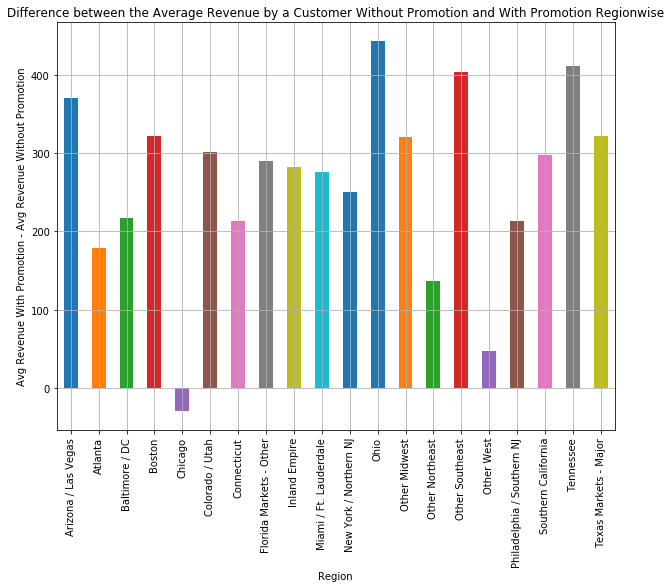

In [30]:
AVG4 = abcdnp.groupby('Region')['AmountEarned'].mean() - abcdp.groupby('Region')['AmountEarned'].mean()

fig, ax = plt.subplots(figsize=(10,7.5))
AVG4.plot.bar(ax = ax)
plt.title('Difference between the Average Revenue by a Customer Without Promotion and With Promotion Regionwise')
plt.xlabel('Region')
plt.ylabel('Avg Revenue With Promotion - Avg Revenue Without Promotion')
ax.grid()
plt.show()

### The Region wise actually will vary the entire concept of promotion. We see that only Chicago and Other West had a significant positive impact on Promotion and we might consider to stop giving the promotion in Regions like Ohio, Arizona, Tennessee.  

### This Inference is also backed up by the T Test performed between Avg Revenue with Promotion and Avg revenue without promotion for individual regions

## Reservation Channel  

### T test for Individual Reservation Channel 

In [31]:
from scipy.stats import ttest_ind

abc = df1.Source.unique()
Sources = abc

for i in Sources: 
    
    dfsources = df1[df1['Source'] == i]

    promotion = dfsources[(dfsources['Promotion_Name'] != 'No Promotion')]
    nopromotion = dfsources[(dfsources['Promotion_Name'] == 'No Promotion')]

    # t test for comparing whether or not Averarge Amount Earned with Promotion > Amount without Promotion

    results = ttest_ind(promotion.AmountEarned, nopromotion.AmountEarned, equal_var=False)

    alpha = 0.05
    if ((results[0] < 0) & (results[1]/2 < alpha)):
        print ("{} - Reject Null Hypothesis".format(i))
    else:
        print ("{} - Accept Null Hypothesis".format(i))

Web Reservation - Reject Null Hypothesis
Sales Center Reservation - Reject Null Hypothesis
Store Reservation - Reject Null Hypothesis


### Visualize Above Result in Graph  

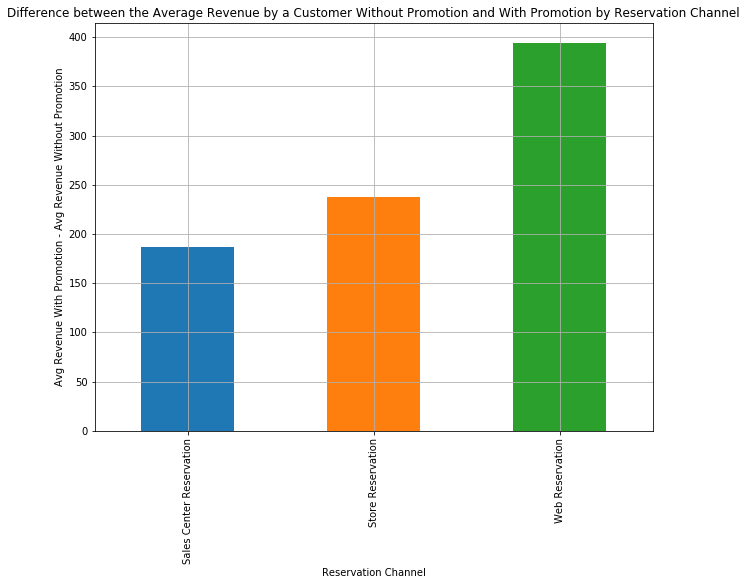

In [32]:
AVG4 = abcdnp.groupby('Source')['AmountEarned'].mean() - abcdp.groupby('Source')['AmountEarned'].mean()

fig, ax = plt.subplots(figsize=(10,7.5))
AVG4.plot.bar(ax = ax)

plt.title('Difference between the Average Revenue by a Customer Without Promotion and With Promotion by Reservation Channel')
plt.xlabel('Reservation Channel')
plt.ylabel('Avg Revenue With Promotion - Avg Revenue Without Promotion')
ax.grid()
plt.show()

### None of the reservation channel did support the promotions as well. In Every of the Reservation Channel, we see that Avg Revenue With Promotion < Avg Revenue Without Promotion, and it is also supported by the T Test performed above 

## Concession 

### T test for concession  

In [33]:
df1['con'] = np.nan
df1.con = df1.con.mask( df1.Concession == 0.0, 'No')
df1.con = df1.con.mask( df1.Concession != 0.0, 'Yes')

/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/arvindramkumar/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
from scipy.stats import ttest_ind

abc = df1.con.unique()
Concessions = abc

for i in Concessions: 
    
    dfConcession = df1[df1['con'] == i]

    promotion = dfConcession[(dfConcession['Promotion_Name'] != 'No Promotion')]
    nopromotion = dfConcession[(dfConcession['Promotion_Name'] == 'No Promotion')]

    # t test for comparing whether or not Averarge Amount Earned with Promotion > Amount without Promotion

    results = ttest_ind(promotion.AmountEarned, nopromotion.AmountEarned, equal_var=False)

    alpha = 0.05
    if ((results[0] < 0) & (results[1]/2 < alpha)):
        print ("{} - Reject Null Hypothesis".format(i))
    else:
        exit()

No - Reject Null Hypothesis
Yes - Reject Null Hypothesis


### The Concession is approximated into whether Concession was given or Not. And with Concession, Yes or No, the result still stays the same. Avg Revenue With Promotion < Avg Revenue Without Promotion for Both Concession Type  

But, may be if we categorize the Concession for 20 bins, between 0 - 5% and so on, may be certain percentage of concession might actually will give a better result, for which the revenue was better with Promotion 

# --------------------------------------------------------------------------------------------

# Qn 5 - What type of restrictions and/or creative adjustments to the structure of the free month promotions would you recommend in order to increase the profitability of the promotion?  Can these recommendations be justified by the data provided?

There are two major problems that we encounter 

1. Because of Monthly Lease, we are unsure of the lenght of the stay
2. The Promotion offer is given out at random and that is not how it has to be done. There should be a criteria for the promotion offer 

Problems: 

1. There are few Customers, who will get the promotional offer (One Month Free) and they Move Out Next Month. So the effective revenue is zero. There is difference between a customer offered Promotional Offer and then stay for just one month and Customer offered promotional offer and stayed for a prolonged period

2. There are few customers who are staying for a prolonged period and they dont get any promotional offer, that need to be considered, in the customer retention point of view 

Solution 

1. The Promotional Offer should be given to the customers who are disclosing their length of stay prior in hand. Or if they are ready to make a commitment for atleast say 5 - 6 Months they could be eligible for the promotional offer. Depending on the number of months they are willing to sign the lease, we could modify the customers Promotional Offer. 

2. If they are sure that they are going to stay for less than two months or just one month, instead of full month free, we can give half month free promotion. 

3. Another advantage of knowing the customer length of stay is, Say a customer plans to rent for 10 Months and Pthe rent per month is 10 Dollars. If we offer him the first month ptomotion, and can increase the rent by just 1 Dollar, we can still break even our actual expectation. 

4. Or as I said above, dealing with the Length of the stay of the customer, if we are able to develop an algorithm that can predict the average stay of the customer, based on this average length, we get the input from customers for their purpose and Storage Reason, we can predict what their average stay would be and then offer them promotion based on that. This could be more accurate than forcing the customers to disclose their length of stay to be eligible for promotion offer 


# --------------------------------------------------------------------------------------------

# Qn 6 - What additional information would be helpful to have to better determine the profitability of the First Month Free promotion?

1. If we had known the revenue or number of customers for any period (Without Promotion) before or after the given time period, it will be possible to know the success 
2. If we know the target Revenue, or the target number of customers, it could help us in understanding the success

# --------------------------------------------------------------------------------------------

# Qn 7 - Estimate probabilistically the likelihood that CubeSmart received more rentals as of result of offering promotions

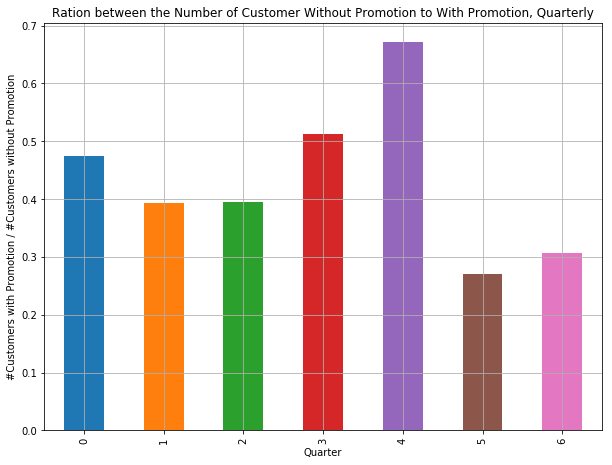

In [35]:
AVG5 = abcdnp.groupby('Quarter')['AmountEarned'].count() / abcdp.groupby('Quarter')['AmountEarned'].count()

fig, ax = plt.subplots(figsize=(10,7.5))
AVG5.plot.bar(ax = ax)

plt.title('Ration between the Number of Customer Without Promotion to With Promotion, Quarterly')
plt.xlabel('Quarter')
plt.ylabel('#Customers with Promotion / #Customers without Promotion')
ax.grid()
plt.show()

In [36]:
AVG5

Quarter
0    0.473745
1    0.393121
2    0.394259
3    0.513031
4    0.671265
5    0.270421
6    0.305970
Name: AmountEarned, dtype: float64

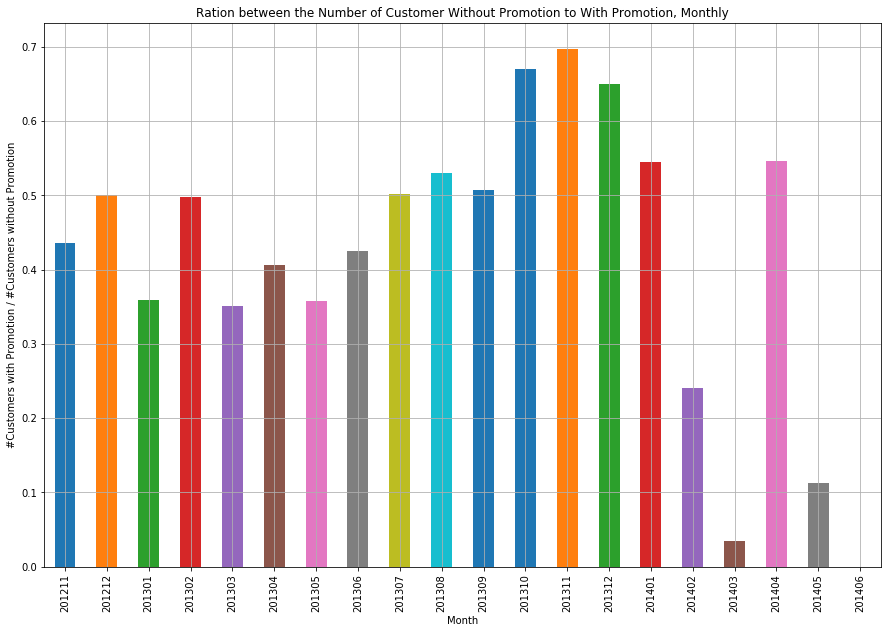

In [37]:
AVG6 = abcdnp.groupby('YearMonth')['AmountEarned'].count() / abcdp.groupby('YearMonth')['AmountEarned'].count()

fig, ax = plt.subplots(figsize=(15,10))
AVG6.plot.bar(ax = ax)
plt.title('Ration between the Number of Customer Without Promotion to With Promotion, Monthly')
plt.xlabel('Month')
plt.ylabel('#Customers with Promotion / #Customers without Promotion')
ax.grid()
plt.show()

### The above two graphs represent the Ratio of Number of Customers With Promotion To Number of Customers without Promotion, Quarterly and Monthly Basis. 

In [38]:
abcde = df.copy()
abcde['Promo'] = np.nan
abcde.Promo = abcde.Promo.mask( abcde.Promotion_Name == 'No Promotion', 'No Promotion')
abcde.Promo = abcde.Promo.mask( abcde.Promotion_Name != 'No Promotion', 'Promotion')

abcde.groupby([ 'Promo', 'Rented'])[["AmountEarned"]].agg(['sum','count', 'mean'])

AmountEarned                   
                             sum  count        mean
Promo        Rented                                
No Promotion 0              0.00   8509    0.000000
             1       10098662.44  11278  895.430257
Promotion    0              0.00  13461    0.000000
             1       15407200.71  25410  606.343987

In [39]:
abcdepromo = abcde[(abcde['Promotion_Name'] != 'No Promotion')]
abcdenopromo = abcde[(abcde['Promotion_Name'] == 'No Promotion')]

withpromo = (abcdepromo.Rented.sum()) / (abcdepromo.Rented.count())
withoutpromo = (abcdenopromo.Rented.sum()) / (abcdenopromo.Rented.count())

morerental = withpromo / withoutpromo
print('Probabilistically, the likelihood of Recieving more rentals due to promotion is', morerental)

Probabilistically, the likelihood of Recieving more rentals due to promotion is 1.1469033336466181


P(Number of Rentals | Promotion) = 25410/(13461+25410)

P(Number of Rentals | No Promo) = 11278/(8509+11278)

Likelihood that we recieve more rentals due to promotion = P(Number of Rentals | Promotion) / P(Number of Rentals |  No Promotion) 

So, because of promotion, you are 1.14 times more likely to have rentals than if you do not have promotion

### So, Probabilistically, becasue of promotion, we are 1.14 times more likely to have more rentals than if we don't have promotion  

# --------------------------------------------------------------------------------------------

# Qn 8 - Estimate probabilistically the likelihood CubeSmart increased revenue when offering these promotions

In [40]:
num = (abcdepromo.AmountEarned.sum()) - (abcdenopromo.AmountEarned.sum()) 
deno = (abcdepromo.AmountEarned.sum()) + (abcdenopromo.AmountEarned.sum())
increasedrevenue = num /deno
print('Probabilistically, the likelihood of Recieving increased Revenue due to promotion is', increasedrevenue)

Probabilistically, the likelihood of Recieving increased Revenue due to promotion is 0.20813011654537955


### Probabilistically, the likelihood of CubeSmart Recieveing Increased Revenue when offering the promotion is 0.21

# --------------------------------------------------------------------------------------------

# Findings

Qn 1 - Free month promotions are effectively a discount for the customer, though hopefully generate some ultimate benefit to revenue.  Using the dataset, can you assess how much incremental revenue is generated (or lost) from the free month promotions?

1. We see that The Promotions, bought in an increase in the number of customers, but the Average Revenue by a customer without promotion is high than a Average Revenue by a with promotion - So, the promotion is not a success in revenue perspective of view.  

2. Also, with the following trend, we can see that with the next 6 quarters, there is a possiblity that the Average Revenue With Promotion will be higher than Average Revenue without promotion - So there is a high chance that after 6 quarters ~ 1.5 Years, we might see a success in giving promotion

3. Also, the total number of reservations required to breakeven the current loss incurred by promotion, taking the number of people who reserve and don't use is ~ 3956 Customers



_________________________________
Qn 2 - Free month promotions are effectively a discount for the customer, though hopefully generate some ultimate benefit to revenue.  Using the dataset, can you assess how much incremental revenue is generated (or lost) from the free month promotions?

1. We Compare, the Revenue from Customer With Promotion and Revenue from Customer without Promotion, and the mean of them is compared statistically using T-Test, and we see that Avg Without Promotion < Avg With Promotion. This is means that the Promotion wasn't a success. 

2. Also, the incremental loss was given by (Avg without Promotion - Avg with Promotion) = 289.0862 Dollars Loss
________
Qn 3 - To what degree does the length of customers' stays impact your responses above and how should it be considered?  What is the most appropriate way to consider customer length of stay, given the number of customers still renting?

1. The Customer's Length of Stay is the most crucial part in the analysis. The Revenue Generated is Entirely Dependent on the length of the customer stay.
2. Here, we have made an assumption that, the customer did move out on the day we collected the data (06/11/2014). But this is a very vague approximation.
3. There is a sophisticated way to obtain the length of the customer's stay.
4. We are sure about the Region in which the customer rent and also the Purpose and the Reason for the Storage (Available for most of the Rented = 1).
5. With these three approximation, it is possible to have a better estimate of the length of stay of the customer.
6. Say, there are a few Customer - Renting in Arizona | Purpose of Business | Storage of business Inventory. There could be 10 such customers with the same set of parameters, and out of which 6 might have moved out and 4 didn't. We average the length of stay of the 6 customers and use that Average as the length of stay for other 4 customers who didn't move out and proceed with analysis.
7. But, sometimes it is impossible to make it work for all possible combinations of three variables. If that is the case, we can use purpose and Region, and even for a very few cases these two combination might not work and that case, we can use the average stay of a customer based on region and this average could be used for customers who didn't move.

_____
Qn 4 - How do customer type (based on survey responses), geographic/regional variations, reservation channel, and price concessions impact consideration of (1) and (2) above?

1. Region
    1. The Region wise actually will vary the entire concept of promotion. We see that only Chicago and Other West had a significant positive impact on Promotion and we might consider to stop giving the promotion in Regions like Ohio, Arizona, Tennessee.
    2. This Inference is also backed up by the T Test performed between Avg Revenue with Promotion and Avg revenue without promotion for individual regions
    
2. Reservation Channel 
    1. None of the reservation channel did support the promotions as well. In Every of the Reservation Channel, we see that Avg Revenue With Promotion < Avg Revenue Without Promotion, and it is also supported by the T Test performed above
    
3. Concession 
    1. The Concession is approximated into whether Concession was given or Not. And with Concession, Yes or No, the result still stays the same. Avg Revenue With Promotion < Avg Revenue Without Promotion for Both Concession Type
    2. But, may be if we categorize the Concession for 20 bins, between 0 - 5% and so on, may be certain percentage of concession might actually will give a better result, for which the revenue was better with Promotion
_________
Qn 5 - What type of restrictions and/or creative adjustments to the structure of the free month promotions would you recommend in order to increase the profitability of the promotion? Can these recommendations be justified by the data provided?

1. There are two major problems that we encounter
    1. Because of Monthly Lease, we are unsure of the lenght of the stay
    2. The Promotion offer is given out at random and that is not how it has to be done. There should be a criteria for the promotion offer
2. Problems:
    1. There are few Customers, who will get the promotional offer (One Month Free) and they Move Out Next Month. So the effective revenue is zero. There is difference between a customer offered Promotional Offer and then stay for just one month and Customer offered promotional offer and stayed for a prolonged period
    2. There are few customers who are staying for a prolonged period and they dont get any promotional offer, that need to be considered, in the customer retention point of view
3. Solution
    1. The Promotional Offer should be given to the customers who are disclosing their length of stay prior in hand. Or if they are ready to make a commitment for atleast say 5 - 6 Months they could be eligible for the promotional offer. Depending on the number of months they are willing to sign the lease, we could modify the customers Promotional Offer.
    2. If they are sure that they are going to stay for less than two months or just one month, instead of full month free, we can give half month free promotion.
    3. Another advantage of knowing the customer length of stay is, Say a customer plans to rent for 10 Months and Pthe rent per month is 10 Dollars. If we offer him the first month ptomotion, and can increase the rent by just 1 Dollar, we can still break even our actual expectation.
    4. Or as I said above, dealing with the Length of the stay of the customer, if we are able to develop an algorithm that can predict the average stay of the customer, based on this average length, we get the input from customers for their purpose and Storage Reason, we can predict what their average stay would be and then offer them promotion based on that. This could be more accurate than forcing the customers to disclose their length of stay to be eligible for promotion offer

_______


Qn 6 - What additional information would be helpful to have to better determine the profitability of the First Month Free promotion?

1. If we had known the revenue or number of customers for any period (Without Promotion) before or after the given time period, it will be possible to know the success
2. If we know the target Revenue, or the target number of customers, it could help us in understanding the success

_______
Qn 7 - Estimate probabilistically the likelihood that CubeSmart received more rentals as of result of offering promotions

1. Probablistically, becasue of promotion, we are 1.14 times more likely to have more rentals than if we don't have promotion
_____
Qn 8 - Estimate probabilistically the likelihood CubeSmart increased revenue when offering these promotions

1. Probabilistically, the likelihood of CubeSmart Recieveing Increased Revenue when offering the promotion is 0.21

# Recommendations

1. To Summarize the entire work, we were able to understand that although promotional offer was successful in the number of customers perspective, it failed in the revenue perspective. The Average Revenue from a customer with promotion < Avg Revenue Without Promotion

2. The likelihood of having more rentals because of Promotion is 1.14

3. So, to break even, we need around ~4000 reservations to break in, and withe current trend it is also possible to observe that after 6 quarters, the Avg Revenue With Promotion will exceed the Avg Revenue Without Promotion. 

4. The Incremental loss of the Promotion is given by [Avg Revenue (Without Promotion) - Avg Revenue (With Promotion)] = 289.08622 Dollars

5. The other possible works that could be done for the better Revenue of the company and the better profitability of the promotion is below 

# Future Work 

1. As mentioned above, reg a way to work with the Length of stay of the customer, I would like to predict the customer length based on the aggregation of the three other variables (Region, purpose and Reason)
2. We have assumed that the variance of Amount Earned With promotion and without promotion to be unequal and we used Welch T Test for all comparison of mean. But we can do Chi squared test to know whether the Variance are equal between the two samples and decide whether to use pooled T test or Welch T Test to compare the mean of the two samples for better significance. 
3. Also, another way to deal with the Length of stay is to consider all the instances that have the actual length of stay and build a model based on this (Probably without the Move Out Date), and once we are able to develop a prediction model, then it is possible to predict the length of stay for all the unknown instances. 
4. For Concession, I have approximated into two different categories, Whether Concession was offered, Yes or No. But it would be more relevant to make the concession into categories of 20 bins (0 - 5% in one bin, 6 - 10% in one bin), and see if there was any range in which promotion might had made a positive impact 
5. We can develop a geographical plot (Geographical heat map), to understand whether is there any pattern on the Amount Earned or the Number of customers. Say there could be more concentration customers around California and AZ and the entire west coast than the east coast. If we are able to understand these geographical impact, then it will be possible to make better understanding about the promotion 
6. We have made an estimate that in the next 6 quarters, there is a possiblity that the Promotion does actually impact the revenue positively. So we can try to see whether this is true using the Time Series Analysis. We aggregate the average salary monthly from 11/2012 - 05/2016 and then we use the Seasonal ARIMA to develop Model for the Amount Earned Vs Time, and using this model, we predict the future amount earned for both With promotion and Without Promotion. Now we can see whether the Promotion was making an impact positively to the revenue 